In [2]:
# 1. Problem Definition
# 2 data
## has 14 attributes
#Evaluation
#Features
#tools 
#We are using pandas, matplotlib, and Numpy for data analysis and manupulation

## Predicting heart disease using machine Learning 

This notebook looks into using various python-based machine learning and data science in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

In [3]:
#import all the tools we need
#Regualr EDA (exploratory data analysis ) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want the plot to appear inside notebook
%matplotlib inline 

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay



In [4]:
# Load Data

In [5]:
df = pd.read_csv("heart-disease.csv")
df.shape #rows, columns

(303, 14)

In [6]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,300,301,302
age,63.0,37.0,41.0,56.0,57.0,57.0,56.0,44.0,52.0,57.0,...,67.0,44.0,63.0,63.0,59.0,57.0,45.0,68.0,57.0,57.0
sex,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
cp,3.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0
trestbps,145.0,130.0,130.0,120.0,120.0,140.0,140.0,120.0,172.0,150.0,...,152.0,120.0,140.0,124.0,164.0,140.0,110.0,144.0,130.0,130.0
chol,233.0,250.0,204.0,236.0,354.0,192.0,294.0,263.0,199.0,168.0,...,212.0,169.0,187.0,197.0,176.0,241.0,264.0,193.0,131.0,236.0
fbs,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
restecg,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
thalach,150.0,187.0,172.0,178.0,163.0,148.0,153.0,173.0,162.0,174.0,...,150.0,144.0,144.0,136.0,90.0,123.0,132.0,141.0,115.0,174.0
exang,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
oldpeak,2.3,3.5,1.4,0.8,0.6,0.4,1.3,0.0,0.5,1.6,...,0.8,2.8,4.0,0.0,1.0,0.2,1.2,3.4,1.2,0.0


In [7]:
#Data exploration (exploratory data analysis or EDA)
#the goal here to find out the data and become a subject matter export and become a subject matter export on the data you'e working with.
#i. what questions we r teying to solve?
#2  what kind of data we have and how we treat different?
#3 whats the missing from the data and how do u deal withit
#4 where are the outliers and why should u caare abt them
#5 how can u add, change or remove features to get more out of the data?

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
#to find out how many of each class there are
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [11]:
 df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

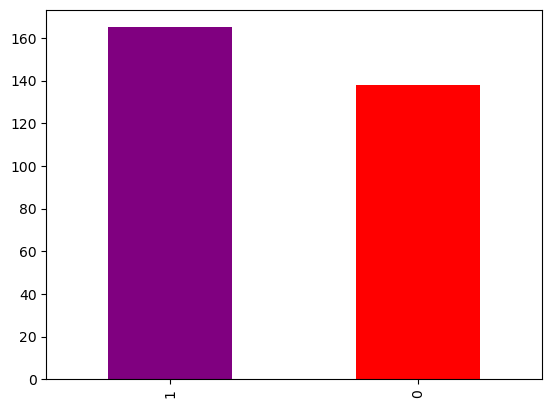

In [12]:
 df['target'].value_counts().plot(kind='bar',color=['purple', 'red'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
#Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
### Heart disease Frequesncy according to sex

In [17]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [18]:
#compare sex with target coloum
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


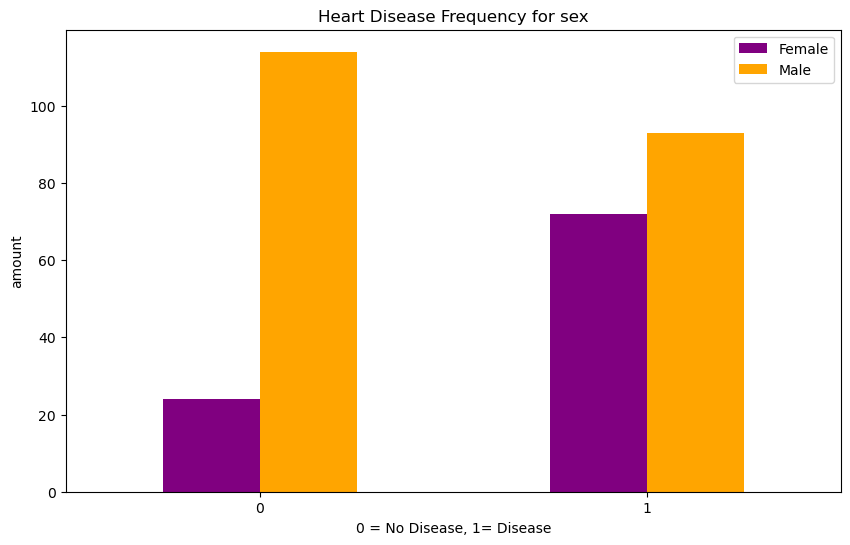

In [19]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6), color=['purple','orange'])
plt.title('Heart Disease Frequency for sex')
plt.xlabel('0 = No Disease, 1= Disease')
plt.ylabel('amount')
plt.legend(['Female','Male'])    
plt.xticks(rotation=0);

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:

df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

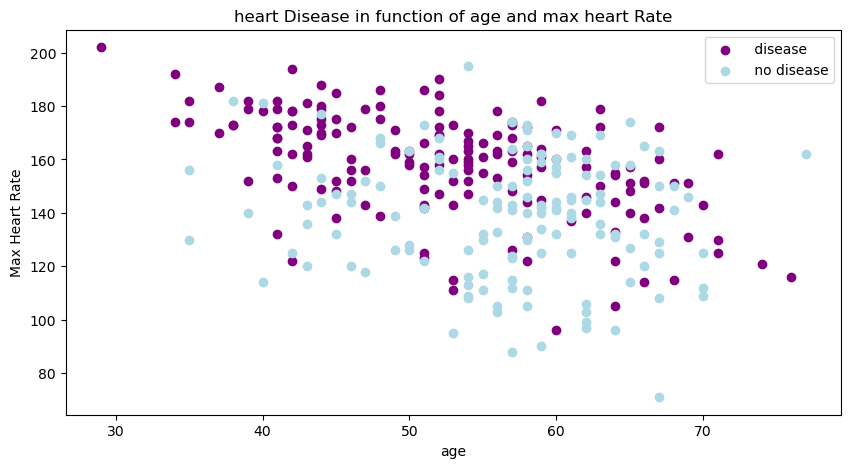

In [22]:
#Age vs Max Heart Rate for Heart Disease
#CREATE ANOTHER FIGURE
plt.figure(figsize=(10,5))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], color='purple')

#scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color='lightblue')

#Add somemore helpful info 
plt.title('heart Disease in function of age and max heart Rate')
plt.xlabel('age')
plt.ylabel('Max Heart Rate')
plt.legend([' disease', ' no disease'])

<Figure size 100x300 with 0 Axes>

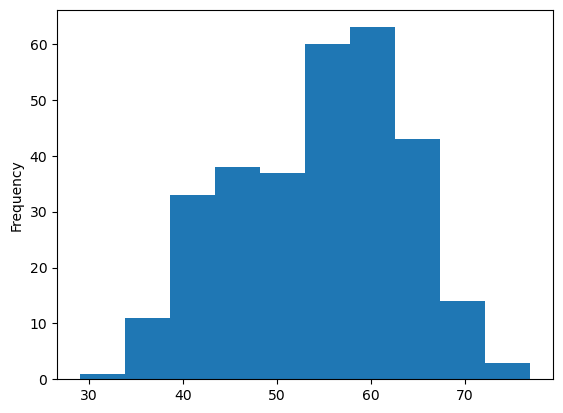

<Figure size 100x300 with 0 Axes>

In [23]:
#check the distribution of age column with histogram
df.age.plot.hist();
plt.figure(figsize=(1,3))

In [24]:
  ###HEART DISEASE FREQUESNCY PER CHEST PAIN TYPE
    #CHEST PAIN TYPE
    #0:TYPICAL ANGINA
    #1:Atypical angina
    #3:non anginal pain
    #4:Asymptomatic    

In [25]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

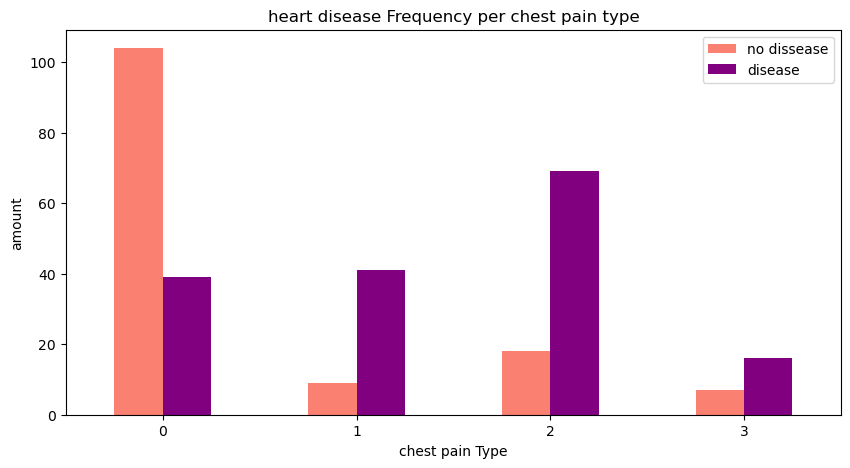

In [26]:
 #MAKE THE CROSSTAB MORE VISUAL
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,5), color=['salmon','purple']) 

#Add some communication
plt.title('heart disease Frequency per chest pain type')
plt.xlabel('chest pain Type')
plt.ylabel('amount')
plt.legend(['no dissease', 'disease'])
plt.xticks(rotation=0)

In [27]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
#Make a correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

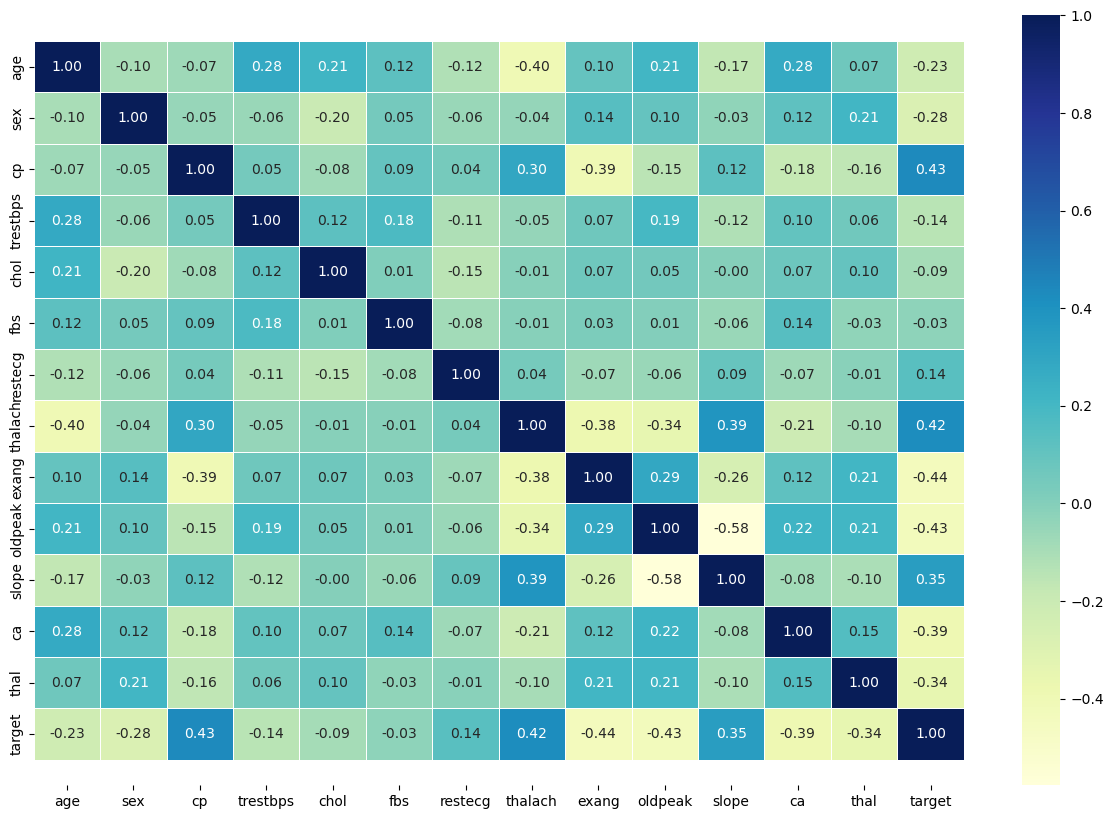

In [29]:
#Lets make out co relation matrix a littlr prettier
#matplotlib/seaborn: first and last row cut in half of heatmap plot
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix, 
               annot=True, 
               linewidths=0.5, 
               fmt='.2f', 
               cmap='YlGnBu');
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
              
    

In [30]:
##5. MODELING 

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
#split data into x and y
#x is going to b everything but target
x= df.drop('target', axis=1)
y=df['target']

In [33]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [35]:
 #split data into train and test sets
np.random.seed(42)
#split into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [37]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [38]:
 y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

In [39]:
#now we got our data split into training and test sets, its time to build a machime learning moddel
# we will train it (find the patterns ) on the training set
# And we'll test it (use the patterns) on the test set.
#we're going to try 3 different machine learning models:
#logistic regression
# K-nearest neighbors classifier
# Random Forest Classifier

In [40]:
#Put models in a dictionary
models = {'logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of difference scikit-Learn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test : test labels
    """
    #set random seed
    np.random.seed(42)
    #make a dictionalry to keeep model scores
    model_scores={}
    #loop through models
    for name,model in models.items():
        #fit the model in data
        model.fit(x_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name]= model.score(x_test,y_test)
    return model_scores   

In [41]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test=x_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\Jeffin\OneDrive\Desktop\conda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<Axes: >

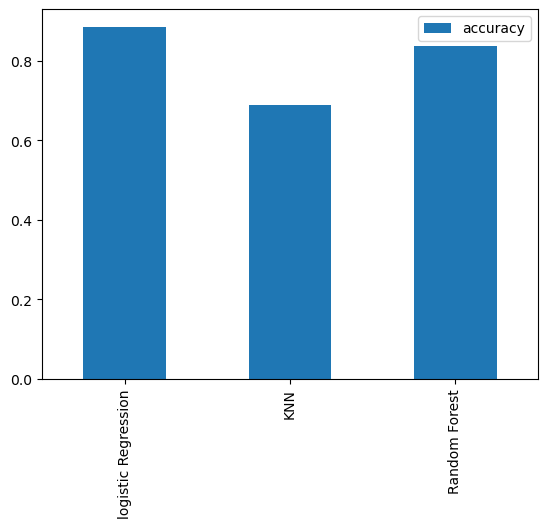

In [42]:
# MODEL COMPARISON
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
#model_compare.plot.bar()
model_compare.T.plot.bar()

(1.5, -0.5)

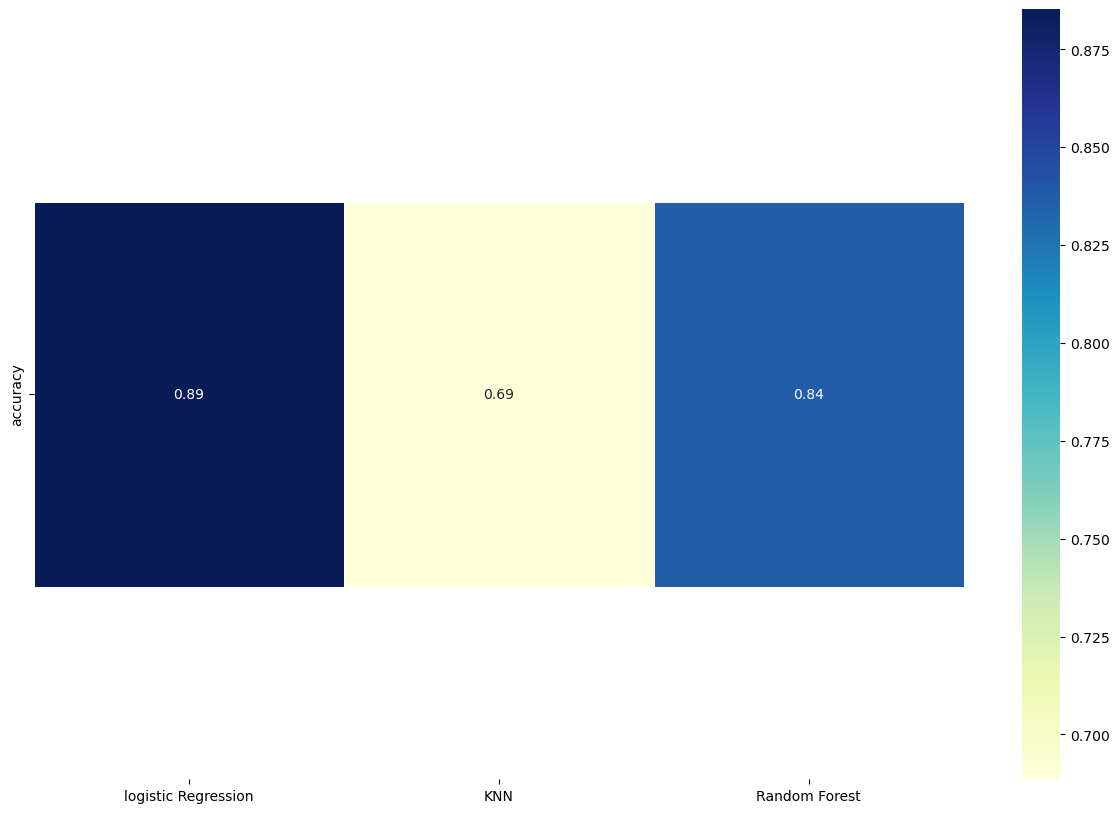

In [43]:
# i did this
corre_matrix=model_compare
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corre_matrix, 
               annot=True, 
               linewidths=0.5, 
               fmt='.2f', 
               cmap='YlGnBu');
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [44]:
 # to search we can use ' how to tune kneighbors classifier'

#  Hyperparameter tuning

In [45]:
# lests tune KNN
train_scores=[]
test_scores=[]

#create a list of different values for n_neighebors
neighbors= range(1, 21)

#setup KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i) # i is gonna loop through neighbors
    
    # Fint the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores List
    train_scores.append(knn.score(x_train, y_train))
    
    # update the test scores list
    test_scores.append(knn.score(x_test, y_test))


In [46]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [47]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on thr test data: 75.41%


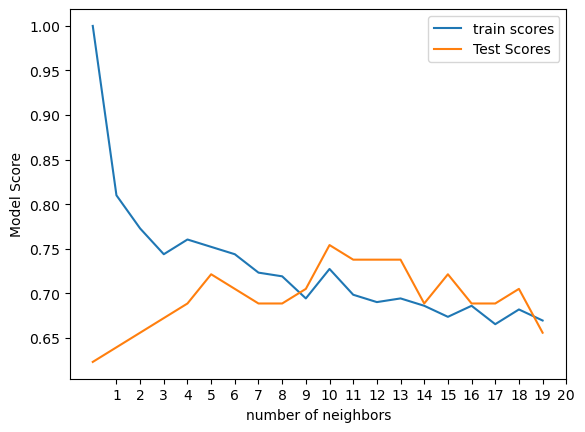

In [48]:
plt.plot( train_scores, label='train scores')
plt.plot(test_scores, label='Test Scores')
plt.xticks(np.arange(1, 21, 1))
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('Model Score')
print(f'Maximum KNN score on thr test data: {max(test_scores)*100:.2f}%')

# Hyperparameter tuning with RandomizedSearchCV
we're going to tune :
* LogisticProgression()
* RandomForestClassifier()
***using RandomizedSearchCV



In [49]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}
# create a hyperparamerter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
          'max_depth': [None,3,5,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

In [50]:
np.random.seed(42)

# Define the hyperparameter grid for logistic regression (log_reg_grid should be defined before this code)
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
}

# Set up random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True,
    n_jobs=-1  # This allows the search to use all available CPU cores
)

# Fit the random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)
                               

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [51]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [52]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [53]:
# setup random seed

np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
# fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train,y_train)


                         
                        

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [54]:
# to find best hyperparameter
rs_rf.best_params_


{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [81]:
#Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

In [56]:
model_scores


{'logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [ ]:
# lets try grid searchcv --- it exhaustively searches through the hyperparameter unlike RandomSearchCV
# since logistic regression is still more than the RandomSearch


## Hyperparameter Tuning with GridSearchCV

In [57]:
log_reg_grid={'C':np.logspace(-4, 4,30),
             'solver': ['liblinear']}

# setup grid hyperparameter search for LogisticRegression
gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
# no n_iter here beacause grid_searchCV goes through all the combinations

# Fit grid hyperparameters search model
gs_log_reg.fit(x_train, y_train);
                         
                       

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [58]:
# check the best hyper parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [59]:
# Evaluate the grid search LogisticRegression model
# Try to improve by using other parameters by searching how to tune logistic regression




gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluate our tuned machine Learning classifier, beyond accuracy
* Roc curve
* confusion Matrix
* Classification Report
* Precision
* Recall
* f1-score

...and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, fie=rst we need to make predictions 


In [60]:
# Make predictions with tuned model

y_preds = gs_log_reg.predict(x_test)

In [61]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [62]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [ ]:
# import ROC curve function from sklearn.metrics module
# plot ROC curve and calculate and calculate AUC metric
#!pip show scikit-learn




In [ ]:
#!pip install --upgrade scikit-learn


In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

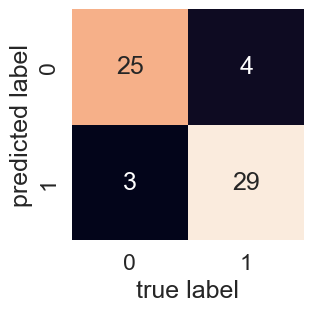

In [63]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    plots a nice looking confusion matrix using seaborns heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
plot_conf_mat(y_test,y_preds)    

In [ ]:
import sklearn
sklearn.__version__

In [64]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate Evaluation metrics using cross validation

we are going to calculate precision, recall and f1-score of our model using cross-validation and so we'll be using 'cross_val_score' 

In [65]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [66]:
# Create a new Classifier with best parameters
clf = LogisticRegression(C= 0.20433597178569418, 
                         solver= 'liblinear')

In [67]:
#cross_validated accuracy
cv_acc=cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [68]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [69]:
# cross-validated precision
cv_precision=cross_val_score(clf,
                             x,
                             y,
                             cv=5,
                             scoring='precision')

cv_precision=np.mean(cv_precision)                       
cv_precision


0.8207936507936507

In [70]:
#cross_validated recall
cv_recall=cross_val_score(clf,
                             x,
                             y,
                             cv=5,
                             scoring='recall')

cv_recall=np.mean(cv_recall)                       
cv_recall

0.9212121212121213

In [71]:
# Cross_validated f1-score
cv_f1=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1
                     
                

0.8673007976269721

<Axes: title={'center': 'cross-validated classification metrics'}>

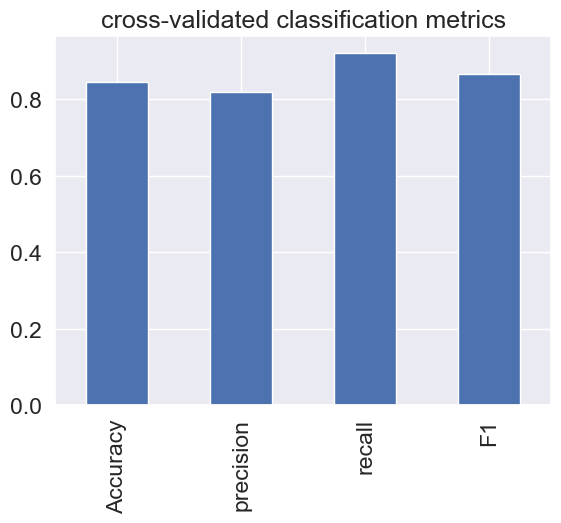

In [72]:
# visualize cross-validated metrics
cv_metrics= pd.DataFrame({'Accuracy':cv_acc,
                          'precision':cv_precision,
                          'recall':cv_recall,
                          'F1':cv_f1},
                           index=[0])
cv_metrics.T.plot.bar(title='cross-validated classification metrics',
                     legend=False)

# Feature Importance
Feature importance is another as asking, 'which features contributed most to the outcomes of the model and how did they contribute?' 

Finding features importance is different for each machine Learning model.

 search 'how to find  features importance in logistic Regression'
 
 lets find feature importance for our LogisticRegression model...

In [73]:

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [75]:
clf=LogisticRegression(C= 0.20433597178569418, 
                         solver= 'liblinear')
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [76]:
#check coef
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [77]:
# Match coef's of features to colums
feature_dict= dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

<Axes: title={'center': 'Feature Impportance'}>

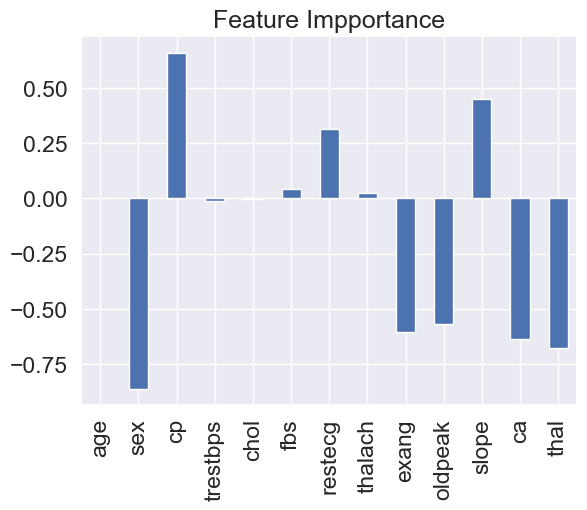

In [78]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Impportance', legend=False)

In [ ]:
# how this is co relates with variable
# helps to finf the target values by using the data's
# here cholestrol isnt contributing at all maybe we can remove it , and it wouldnt affect the model 


In [79]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [80]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak excercise ST segment
* 0: unslopping : better heart rate with excercise (uncommon)
* 1: Flatslopping: minimal change (typical healthy heart)
* 2: Downslopping: signs of unhealthy heart

## 6. EXPERIMENTATION

if u havent hit your evaluation metric yet.. ask yourself...

* could you collect more data?
* could you try a better model ? Like CatBoost or XGBoost?
* could u=you improve the current models? (beyond what we've done so far)
* if we did manage to make really good model how do we export it to someone else( search sklearn how to export a model)


In [ ]:
# maybe we can find some other classification dataset in UCI Machine Learning Repository
